# Feature Normalisation and Scaling
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Scripts\python.exe
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x0000020B0111F590>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine Learning Assignment', 'C:\\Users\\hp\\anaconda3\\python311.zip', 'C:\\Users\\hp\\anaconda3\\DLLs', 'C:\\Users\\hp\\anaconda3\\Lib', 'C:\\Users\\hp\\anaconda3', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv', '', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment']


# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
# For DataFrame
import pandas as pd
import numpy as np

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical computation
from scipy import stats

# For feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For serialisation
import pickle

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df = pd.read_csv(r'../raw_data/customer_sampled_srs_preprocessed_knn_n3.csv', index_col = 'CUST_ID')

# Feature Normalisation & Scaling
This section is conduct to gain data of better quality, which is of similar scales and approximately normally distributed

## 1.0 Feature Normalisation
Here a few transformation techniques are experimented:
1. Log transformation
2. Square root transformation
3. Box-Cox transformation

In [4]:
# DROPPING DERIVED COLUMNS
df = df.drop(['PURCHASES', 'PURCHASES_FREQUENCY'], axis = 1)

skewed_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'KNN_IMPUTED_CREDIT_LIMIT', 'PAYMENTS', 'KNN_IMPUTED_MINIMUM_PAYMENTS']

## 1.1 Handling Positively Skewed Features

Here the performance of Box-Cox transformation is the best for almost all features, hence Box-Cox transformation is employed for all positively skewed features

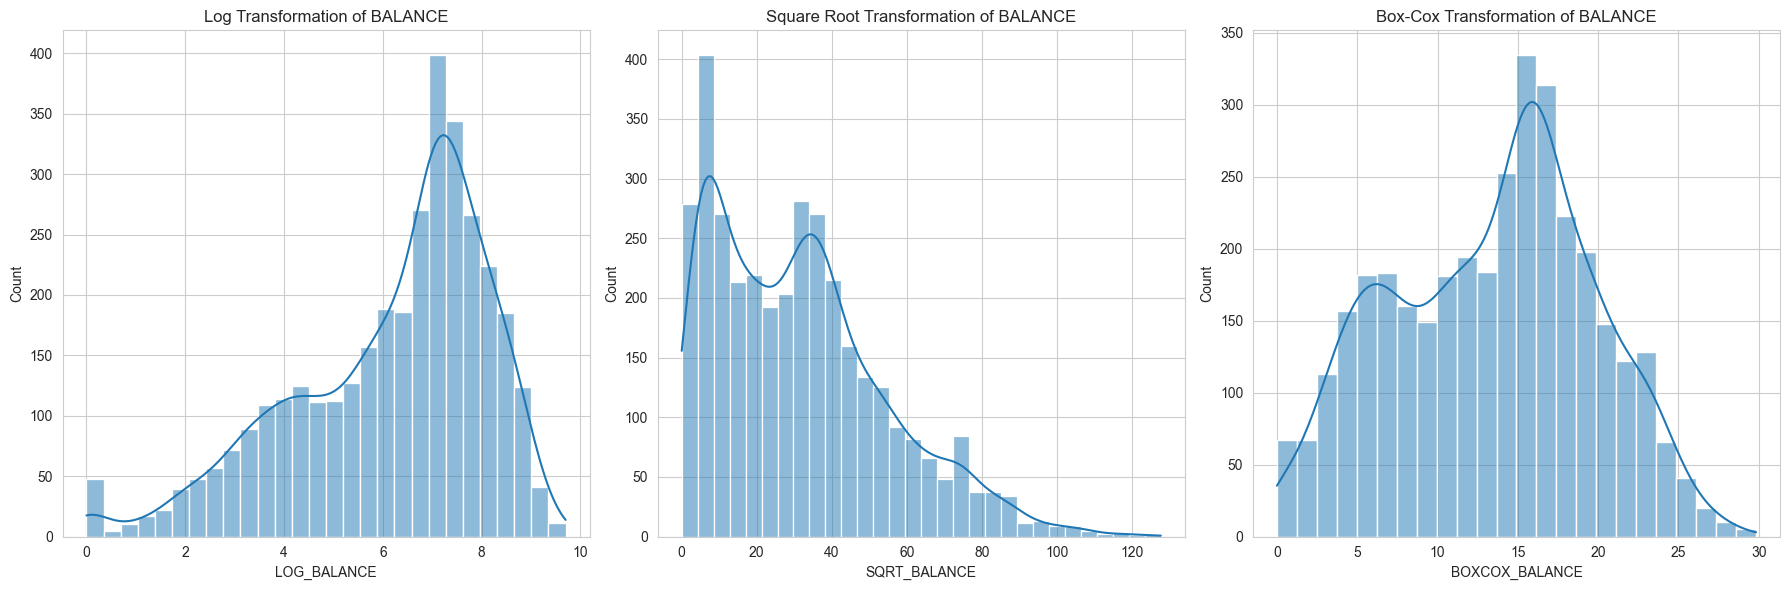

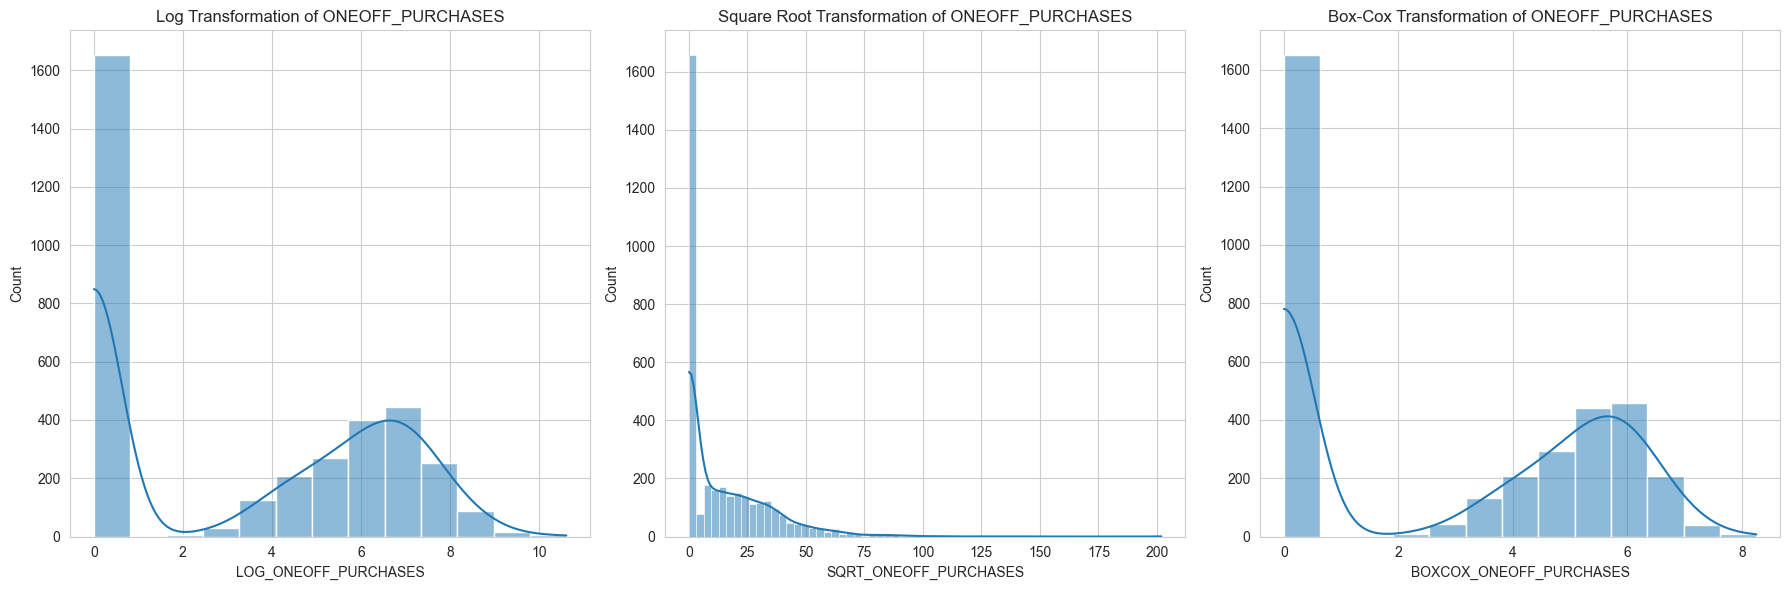

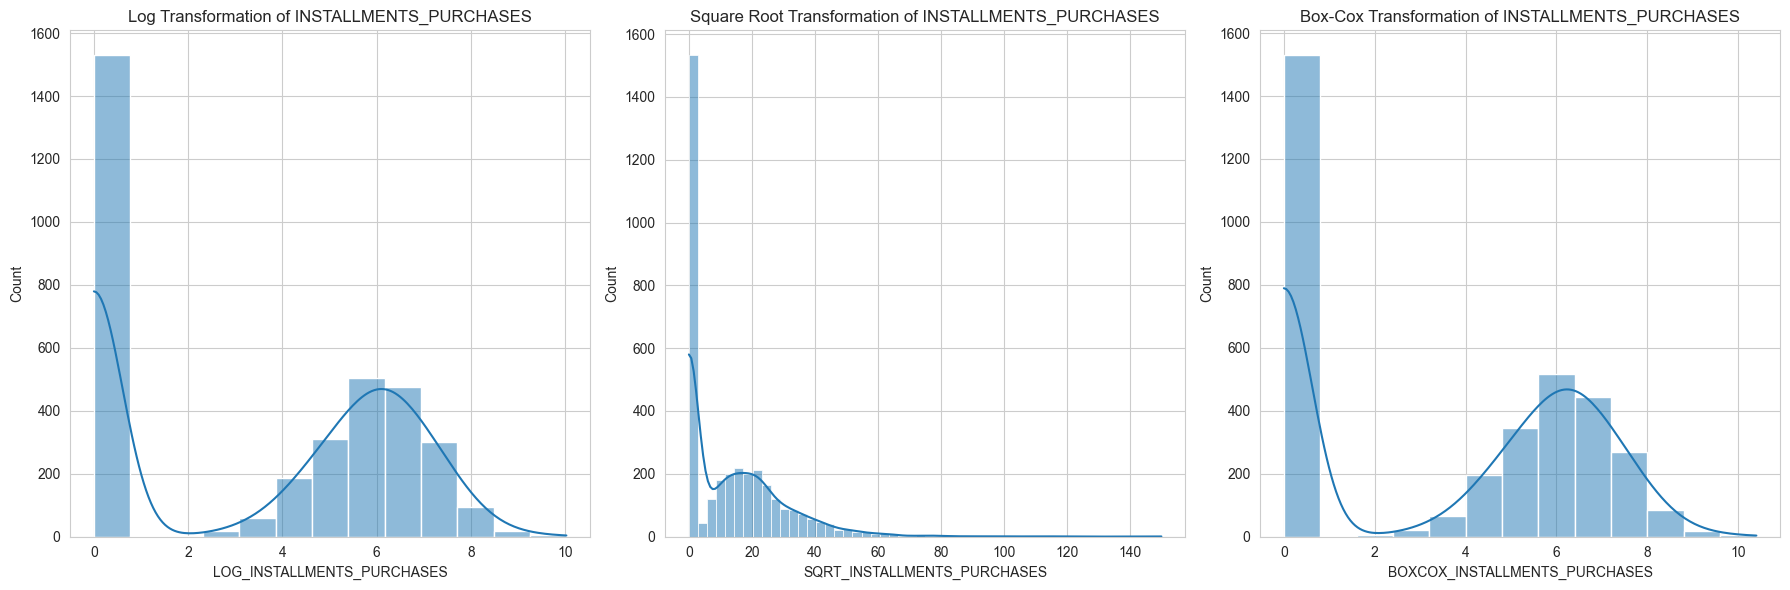

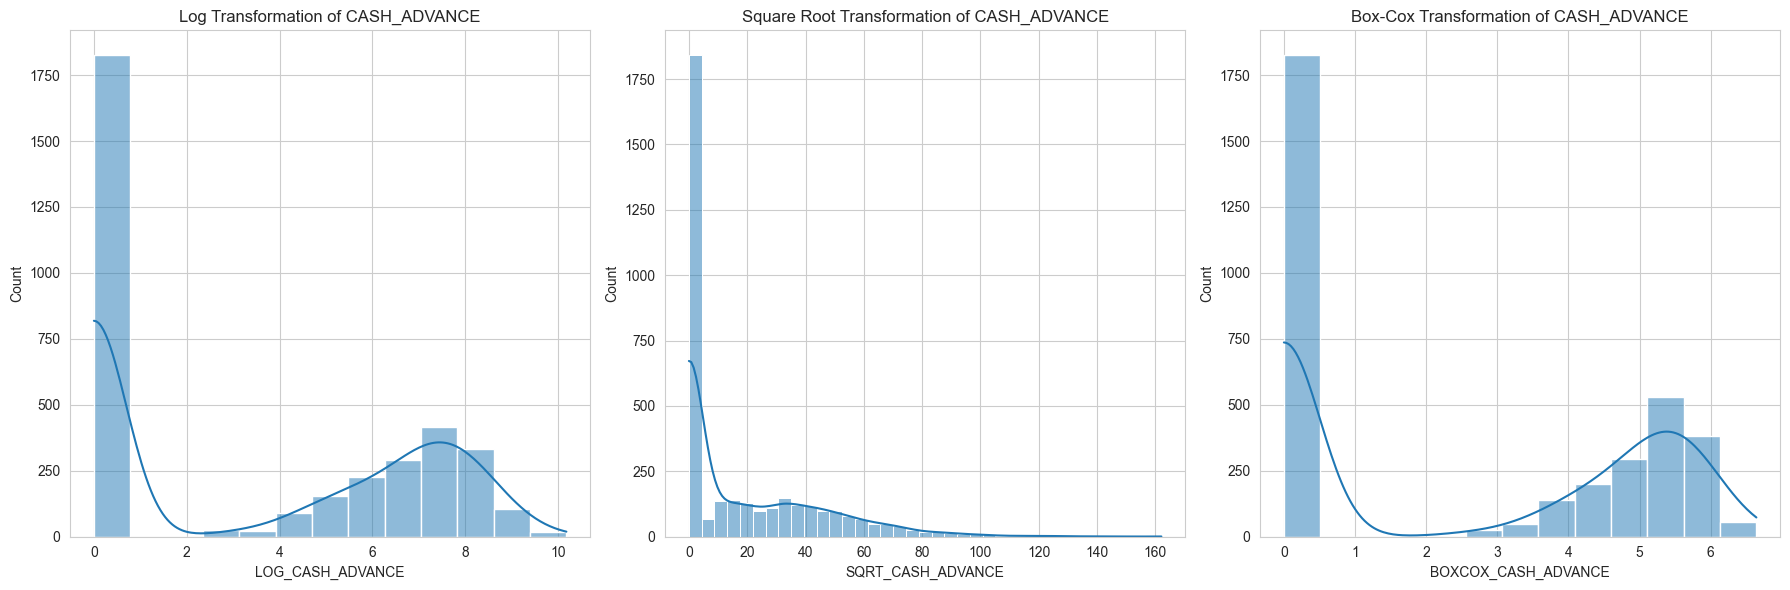

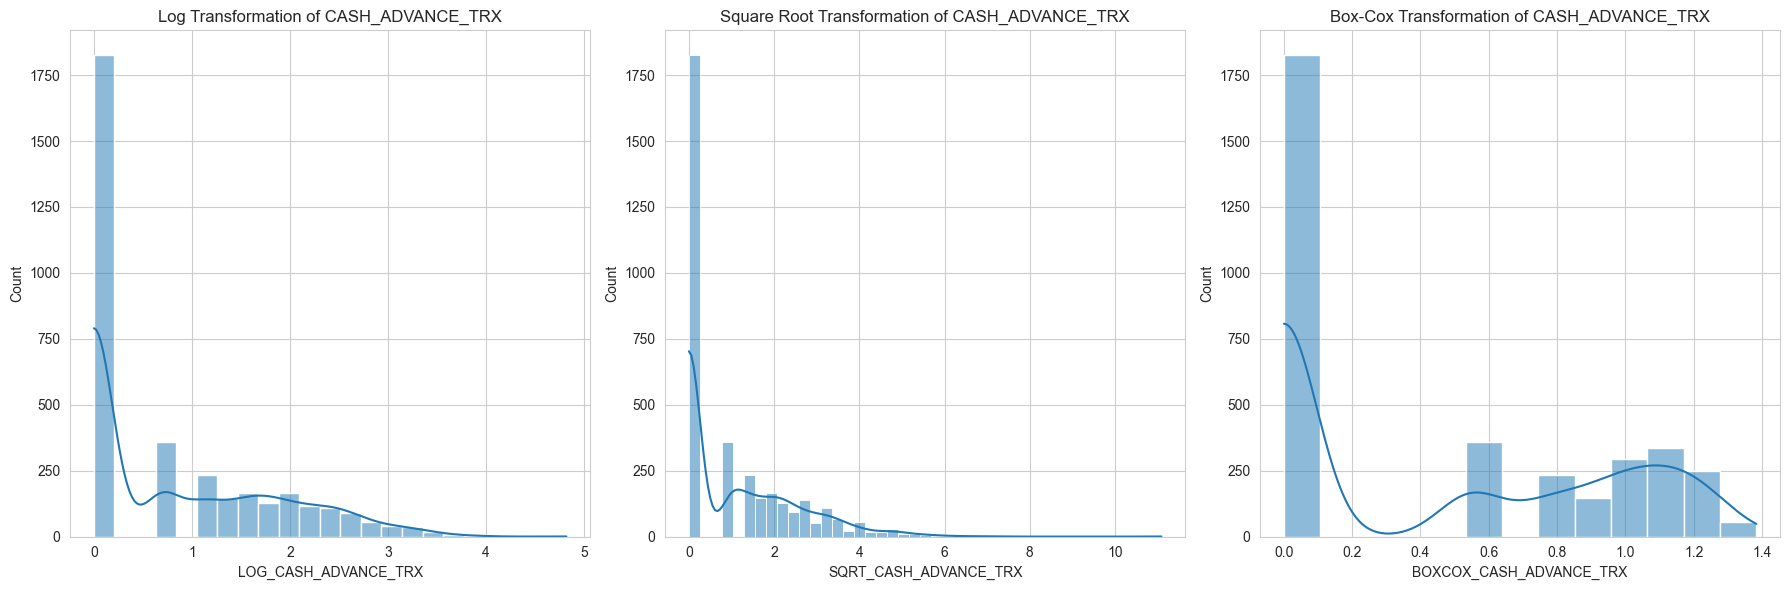

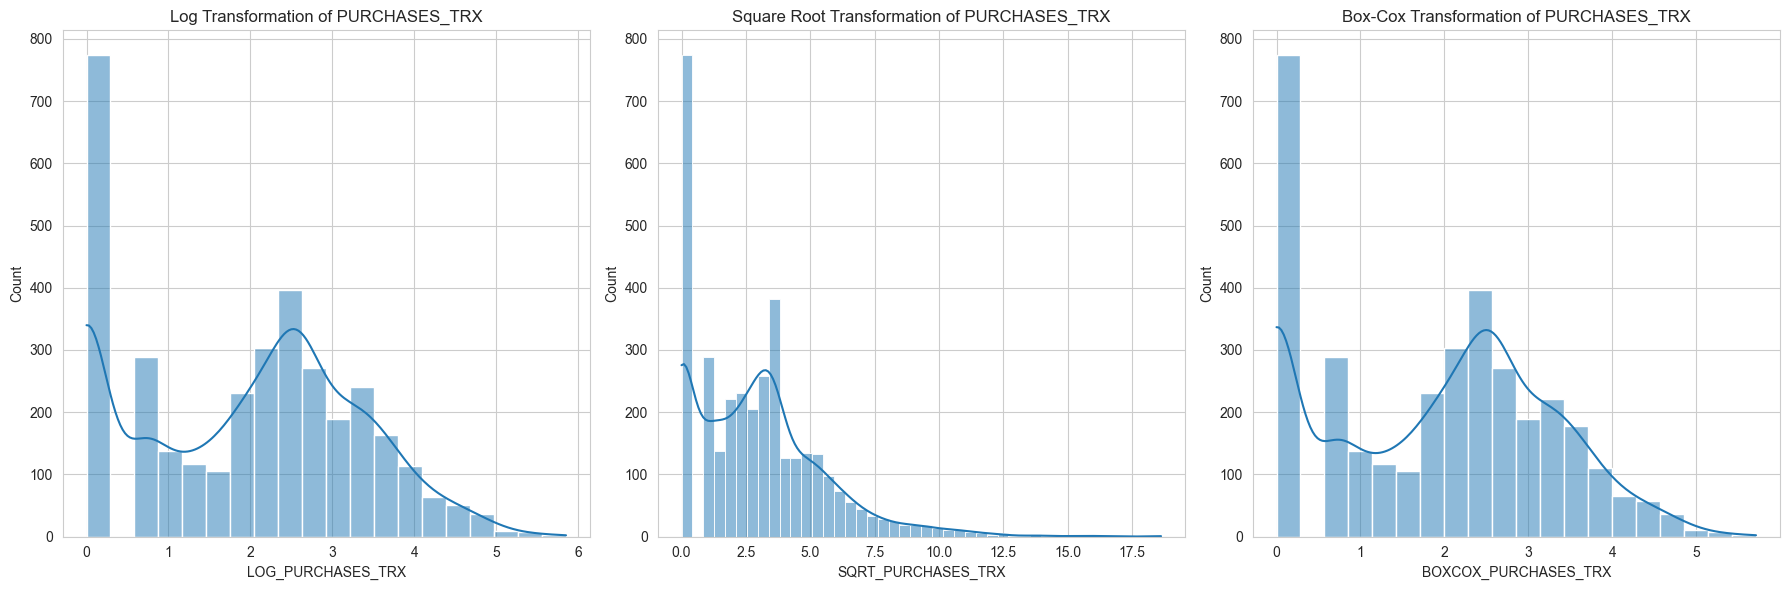

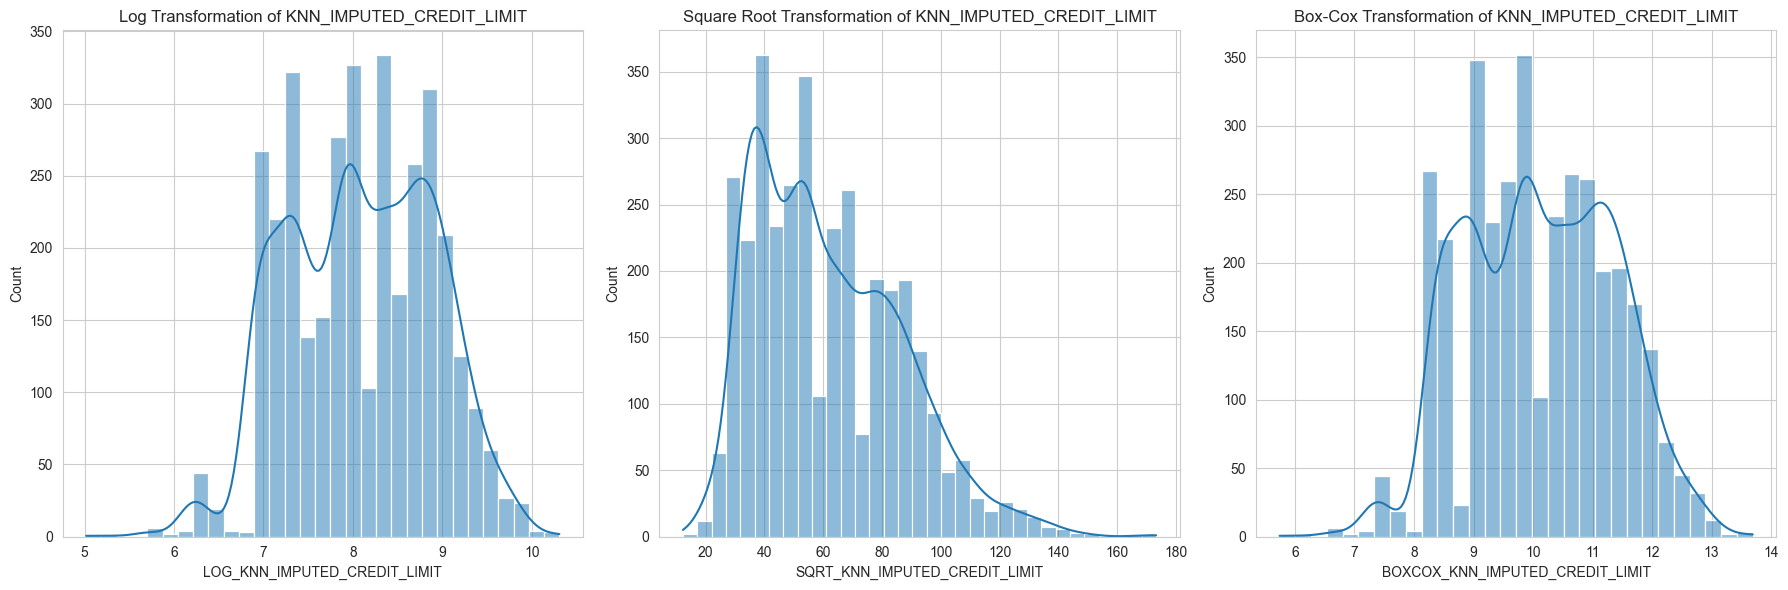

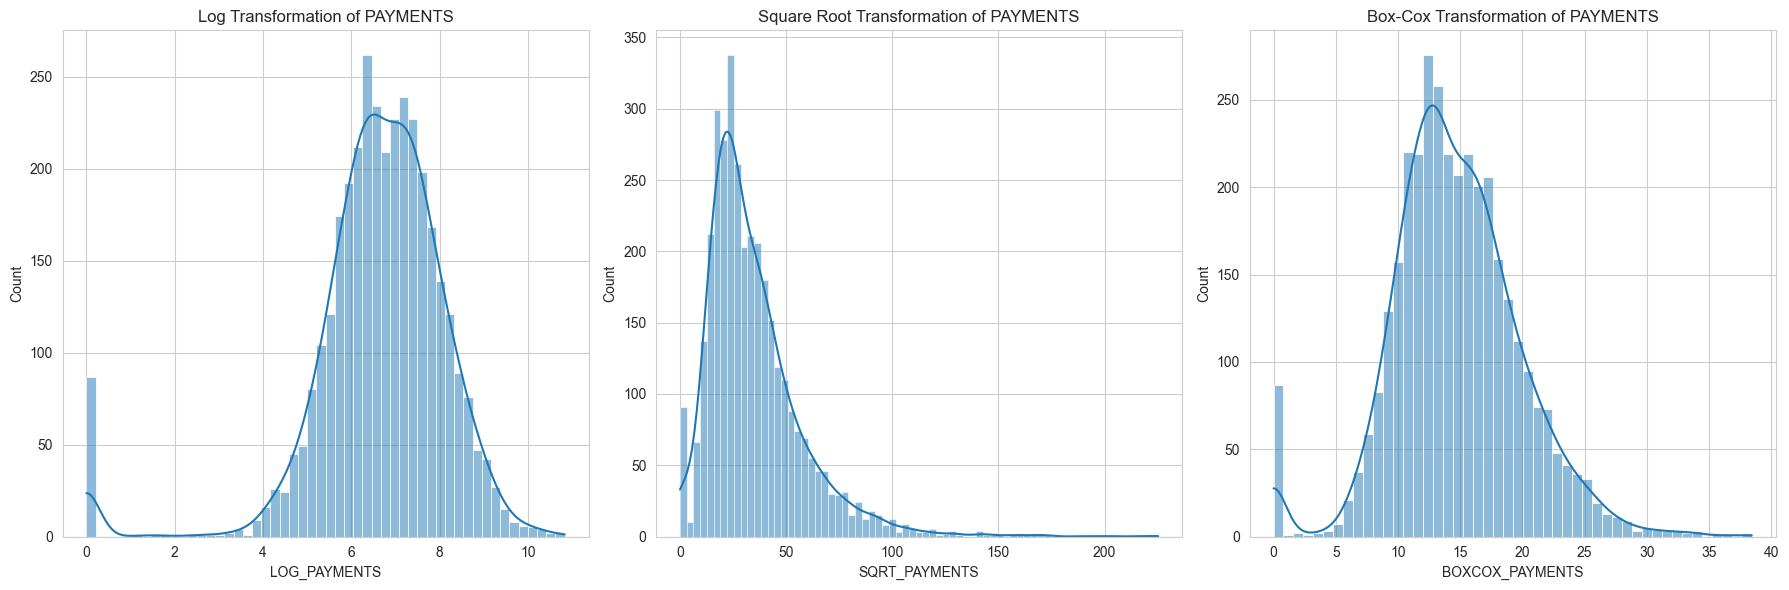

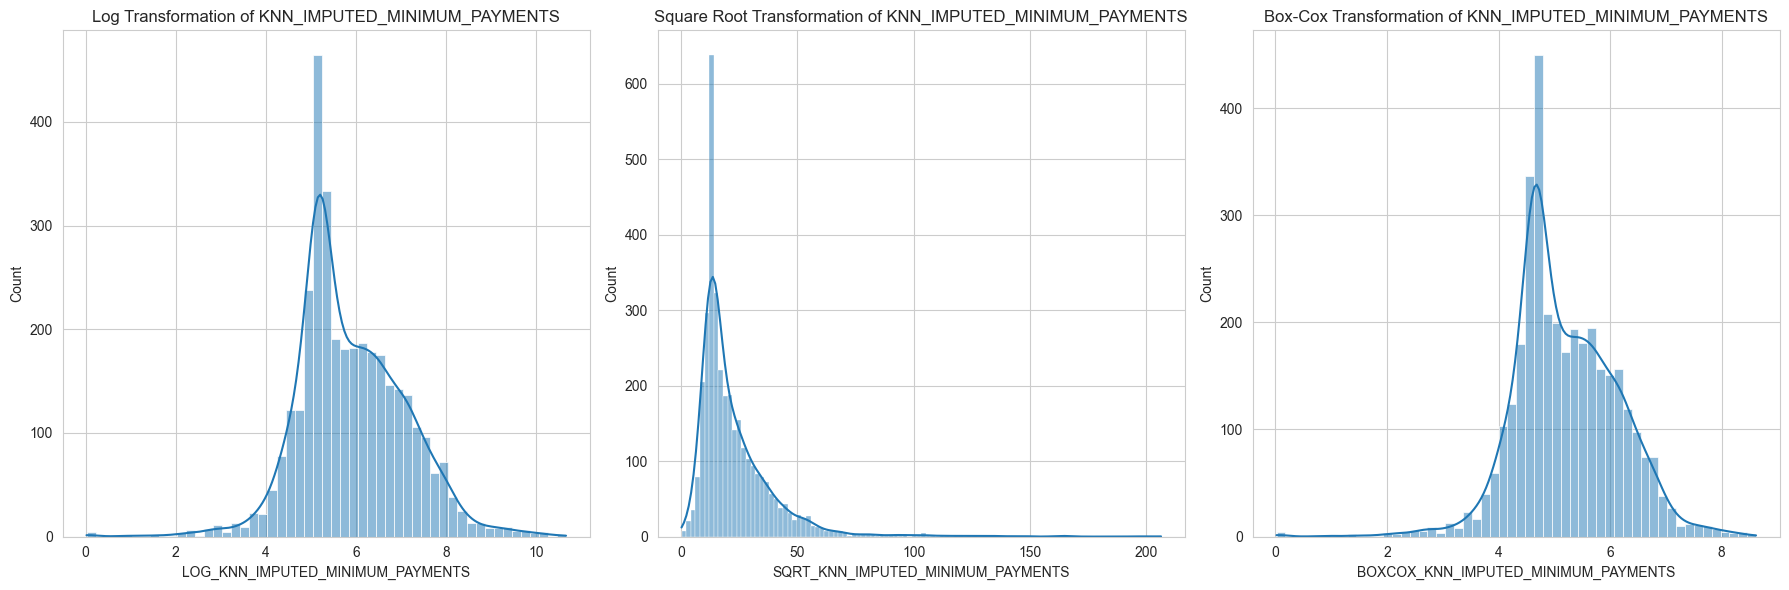

In [5]:
# Define a function to apply transformations
def transform_features(df, features):
    df_transformed = df.copy()
    
    series_lambdas = pd.Series(index = features, name = 'OPTIMAL_LAMBDA')
    for feature in features:
        # Log transformation
        df_transformed[f'LOG_{feature}'] = np.log1p(df_transformed[feature])

        # Square root transformation
        df_transformed[f'SQRT_{feature}'] = np.sqrt(df_transformed[feature])

        # Box-Cox transformation (only for positive values)
        # Letting the function find the optimal lambda according to maximum likelihood criterion
        df_transformed[f'BOXCOX_{feature}'], series_lambdas[feature] = stats.boxcox(df_transformed[feature] + 1)  # Adding 1 to avoid zero values

    return df_transformed, series_lambdas

# Apply transformations
df_transformed, series_lambdas = transform_features(df, skewed_cols)

# Plot the distributions of the transformed features
for feature in skewed_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.histplot(df_transformed[f'LOG_{feature}'], kde=True, ax=axes[0])
    axes[0].set_title(f'Log Transformation of {feature}')

    sns.histplot(df_transformed[f'SQRT_{feature}'], kde=True, ax=axes[1])
    axes[1].set_title(f'Square Root Transformation of {feature}')

    sns.histplot(df_transformed[f'BOXCOX_{feature}'], kde=True, ax=axes[2])
    axes[2].set_title(f'Box-Cox Transformation of {feature}')

    plt.tight_layout()
    plt.show()

In [6]:
sqrt_transformed_cols = ['SQRT_BALANCE', 'SQRT_ONEOFF_PURCHASES', 'SQRT_INSTALLMENTS_PURCHASES', 'SQRT_CASH_ADVANCE', 'SQRT_CASH_ADVANCE_TRX', 'SQRT_PURCHASES_TRX', 'SQRT_KNN_IMPUTED_CREDIT_LIMIT', 'SQRT_PAYMENTS', 'SQRT_KNN_IMPUTED_MINIMUM_PAYMENTS']
log_transformed_cols =  ['LOG_BALANCE', 'LOG_ONEOFF_PURCHASES', 'LOG_INSTALLMENTS_PURCHASES', 'LOG_CASH_ADVANCE', 'LOG_CASH_ADVANCE_TRX', 'LOG_PURCHASES_TRX', 'LOG_KNN_IMPUTED_CREDIT_LIMIT', 'LOG_PAYMENTS', 'LOG_KNN_IMPUTED_MINIMUM_PAYMENTS']

df_transformed = df_transformed.drop(skewed_cols + sqrt_transformed_cols + log_transformed_cols, axis = 1)
df_transformed

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE,BOXCOX_BALANCE,BOXCOX_ONEOFF_PURCHASES,BOXCOX_INSTALLMENTS_PURCHASES,BOXCOX_CASH_ADVANCE,BOXCOX_CASH_ADVANCE_TRX,BOXCOX_PURCHASES_TRX,BOXCOX_KNN_IMPUTED_CREDIT_LIMIT,BOXCOX_PAYMENTS,BOXCOX_KNN_IMPUTED_MINIMUM_PAYMENTS
CUST_ID,,,,,,,,,,,,,,,
C17875,0.454545,0.090909,0.000000,0.090909,0.000000,11,3.898193,2.590326,0.000000,4.236474,0.549590,0.691149,11.389953,11.787449,4.086268
C16296,1.000000,0.166667,0.500000,0.333333,0.000000,12,12.616403,5.342781,4.853038,5.411829,1.164310,2.374094,9.347864,16.918948,5.345615
C17219,1.000000,0.000000,1.000000,0.000000,0.000000,12,8.036763,0.000000,5.968641,0.000000,0.000000,3.006222,9.347864,10.897678,4.607999
C13108,1.000000,0.666667,0.416667,0.083333,0.000000,12,14.484453,6.279941,3.961254,4.229377,0.549590,3.475046,8.922046,14.643246,4.839874
C13576,1.000000,0.416667,1.000000,0.000000,0.083333,12,15.980246,6.273924,7.300573,0.000000,0.000000,3.702861,11.279793,22.949083,5.477003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C14210,1.000000,0.000000,0.000000,0.083333,0.000000,12,16.721496,0.000000,0.000000,5.209693,0.967004,0.000000,10.195057,11.283049,5.441214
C17858,0.636364,0.083333,0.250000,0.000000,0.000000,12,4.352239,4.847723,5.112122,0.000000,0.000000,2.061526,10.400946,11.663034,4.103956
C12903,0.272727,0.000000,0.500000,0.000000,0.500000,12,2.728368,0.000000,5.241419,0.000000,0.000000,1.930216,9.347864,11.317860,3.945595


# 2.0 Feature Scaling

Here three methods are experimented:
1. Standard Scaling
2. Min-max Scaling

## 2.1 Standard Scaling

In [7]:
standard_scaler = StandardScaler()
standard_scaled_transformed_data = standard_scaler.fit_transform(df_transformed)

df_standard_scaled_transformed = pd.DataFrame(standard_scaled_transformed_data, index = df_transformed.index, columns = 'STANDARD_' + df_transformed.columns)
df_standard_scaled_transformed

,STANDARD_BALANCE_FREQUENCY,STANDARD_ONEOFF_PURCHASES_FREQUENCY,STANDARD_PURCHASES_INSTALLMENTS_FREQUENCY,STANDARD_CASH_ADVANCE_FREQUENCY,STANDARD_PRC_FULL_PAYMENT,STANDARD_TENURE,STANDARD_BOXCOX_BALANCE,STANDARD_BOXCOX_ONEOFF_PURCHASES,STANDARD_BOXCOX_INSTALLMENTS_PURCHASES,STANDARD_BOXCOX_CASH_ADVANCE,STANDARD_BOXCOX_CASH_ADVANCE_TRX,STANDARD_BOXCOX_PURCHASES_TRX,STANDARD_BOXCOX_KNN_IMPUTED_CREDIT_LIMIT,STANDARD_BOXCOX_PAYMENTS,STANDARD_BOXCOX_KNN_IMPUTED_MINIMUM_PAYMENTS
CUST_ID,,,,,,,,,,,,,,,
C17875,-1.788879,-0.389241,-0.918494,-0.209173,-0.529623,-0.388720,-1.510041,-0.071965,-1.084765,0.700678,0.219281,-0.887569,1.028822,-0.552805,-1.199869
C16296,0.515477,-0.140557,0.338631,1.017650,-0.529623,0.360465,-0.124227,0.931692,0.446162,1.154706,1.469533,0.351618,-0.615753,0.437169,0.152764
C17219,0.515477,-0.687659,1.595755,-0.669231,-0.529623,0.360465,-0.852190,-1.016504,0.798087,-0.935831,-0.898508,0.817067,-0.615753,-0.724461,-0.639491
C13108,0.515477,1.500747,0.129111,-0.247512,-0.529623,0.360465,0.172711,1.273419,0.164842,0.697936,0.219281,1.162271,-0.958680,-0.001862,-0.390439
C13576,0.515477,0.680095,1.595755,-0.669231,-0.247211,0.360465,0.410476,1.271225,1.218255,-0.935831,-0.898508,1.330017,0.940106,1.600509,0.293885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C14210,0.515477,-0.687659,-0.918494,-0.247512,-0.529623,0.360465,0.528302,-1.016504,-1.084765,1.076623,1.068242,-1.396476,0.066525,-0.650115,0.255444
C17858,-1.020757,-0.414110,-0.289932,-0.669231,-0.529623,0.360465,-1.437867,0.751174,0.527892,-0.935831,-0.898508,0.121468,0.232336,-0.576808,-1.180871
C12903,-2.556997,-0.687659,0.338631,-0.669231,1.164856,0.360465,-1.695992,-1.016504,0.568679,-0.935831,-0.898508,0.024782,-0.615753,-0.643399,-1.350962


## 2.2 Min-Max Scaling

In [8]:
minmax_scaler = MinMaxScaler(feature_range = (0, 1))

minmax_scaled_transformed_data = minmax_scaler.fit_transform(df_transformed)

df_minmax_scaled_transformed = pd.DataFrame(minmax_scaled_transformed_data, index = df_transformed.index, columns = 'MINMAX_' + df_transformed.columns)
df_minmax_scaled_transformed

,MINMAX_BALANCE_FREQUENCY,MINMAX_ONEOFF_PURCHASES_FREQUENCY,MINMAX_PURCHASES_INSTALLMENTS_FREQUENCY,MINMAX_CASH_ADVANCE_FREQUENCY,MINMAX_PRC_FULL_PAYMENT,MINMAX_TENURE,MINMAX_BOXCOX_BALANCE,MINMAX_BOXCOX_ONEOFF_PURCHASES,MINMAX_BOXCOX_INSTALLMENTS_PURCHASES,MINMAX_BOXCOX_CASH_ADVANCE,MINMAX_BOXCOX_CASH_ADVANCE_TRX,MINMAX_BOXCOX_PURCHASES_TRX,MINMAX_BOXCOX_KNN_IMPUTED_CREDIT_LIMIT,MINMAX_BOXCOX_PAYMENTS,MINMAX_BOXCOX_KNN_IMPUTED_MINIMUM_PAYMENTS
CUST_ID,,,,,,,,,,,,,,,
C17875,0.454545,0.090909,0.000000,0.060606,0.000000,0.833333,0.130648,0.313893,0.000000,0.637728,0.397189,0.121004,0.710545,0.306803,0.473001
C16296,1.000000,0.166667,0.500000,0.222222,0.000000,1.000000,0.422837,0.647433,0.466439,0.814657,0.841448,0.415649,0.453614,0.440366,0.619455
C17219,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.269351,0.000000,0.573662,0.000000,0.000000,0.526320,0.453614,0.283644,0.533675
C13108,1.000000,0.666667,0.416667,0.055555,0.000000,1.000000,0.485445,0.760997,0.380727,0.636660,0.397189,0.608400,0.400039,0.381134,0.560640
C13576,1.000000,0.416667,1.000000,0.000000,0.083333,1.000000,0.535576,0.760268,0.701678,0.000000,0.000000,0.648285,0.696685,0.597318,0.634735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C14210,1.000000,0.000000,0.000000,0.055555,0.000000,1.000000,0.560419,0.000000,0.000000,0.784229,0.698855,0.000000,0.560206,0.293675,0.630572
C17858,0.636364,0.083333,0.250000,0.000000,0.000000,1.000000,0.145865,0.587442,0.491340,0.000000,0.000000,0.360925,0.586111,0.303565,0.475058
C12903,0.272727,0.000000,0.500000,0.000000,0.500000,1.000000,0.091441,0.000000,0.503767,0.000000,0.000000,0.337936,0.453614,0.294581,0.456641


# Saving the Dataset and Scalers

In [9]:
with open(r'../raw_data/standard_scaler.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)
    
with open(r'../raw_data/minmax_scaler.pkl', 'wb') as file:
    pickle.dump(minmax_scaler, file)
    
df_lambdas = series_lambdas.reset_index()
df_lambdas.columns = ['FEATURE', 'OPTIMAL_LAMBDA']
df_lambdas.to_csv(r'../raw_data/boxcox_lambdas.csv', index = False)

df_standard_scaled_transformed.to_csv(r'../raw_data/customer_standard_scaled.csv')